## Business Overview


### Introduction 
As data scientist we have been tasked by a real estate agency to asses the factors that affect the selling price of houses from a dataset that contains data of houses sold in King County, Washington, USA between May 2014 and May 2015.

## Business Understanding

The real estate agency needs to provide homeowners with accurate and reliable information about the potential increase in home value due to different factors. We will use the King County House Sales dataset to analyze the factors that lead to the change in home value.The analysis is to help them understand and predict the real estate industry . 


## Data Understanding

In [1]:
# importing neccesary libraries 
import pandas as pd
import numpy as np 
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt 
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

In [23]:
# loading our data
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [24]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [26]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Data Preparation & Cleaning

### Handling Missing Values 


In [27]:
#checking for missing values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [28]:
# dropping missing values 
df.dropna(inplace=True)
df.isna().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [29]:
# checking for duplicatas
df.duplicated().sum()

0

In [30]:
# checking for outliers for Price 
df['price'].head()

1     538000.0
3     604000.0
4     510000.0
5    1230000.0
6     257500.0
Name: price, dtype: float64

### Cleaning price column

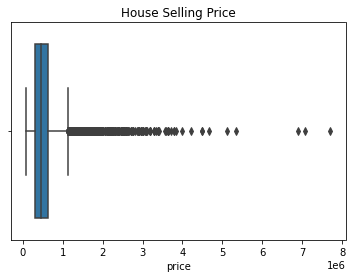

In [31]:
# visualizing outliers 

sns.boxplot(x = df.price)
plt.title('House Selling Price')
plt.show()

In [32]:
def remove_outliers(column,x):
    new_column = column[(np.abs(stats.zscore(column))<x)]
    return new_column

In [33]:
#remove price outliers
price = remove_outliers(df.price,5)
price

1         538000.0
3         604000.0
4         510000.0
5        1230000.0
6         257500.0
           ...    
21591     475000.0
21592     360000.0
21593     400000.0
21594     402101.0
21596     325000.0
Name: price, Length: 15672, dtype: float64

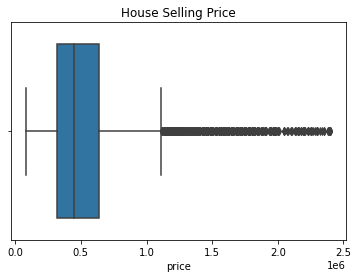

In [34]:
#review price

sns.boxplot(x = price)
plt.title('House Selling Price')
plt.show()

### Cleaning Square foot living column

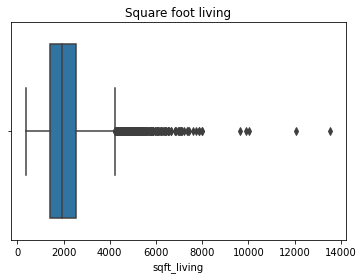

In [35]:
# visualizing Square foot living outliers 

sns.boxplot(x = df.sqft_living)
plt.title('Square foot living')
plt.show()

In [36]:
#remove Square foot living outliers
sqft_living = remove_outliers(df.sqft_living,5)

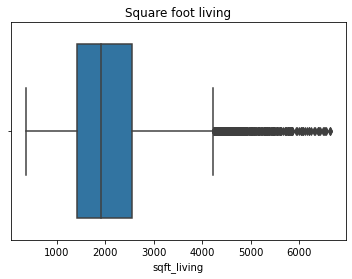

In [37]:
#review Square foot living

sns.boxplot(x = sqft_living)
plt.title('Square foot living')
plt.show()

### Cleaning Square foot lot column

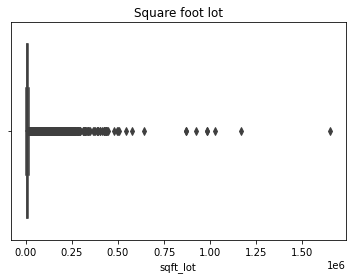

In [38]:
# visualizing Square foot lot outliers 

sns.boxplot(x = df.sqft_lot)
plt.title('Square foot lot')
plt.show()

In [39]:
#remove Square foot lot outliers
sqft_lot = remove_outliers(df.sqft_lot,3)

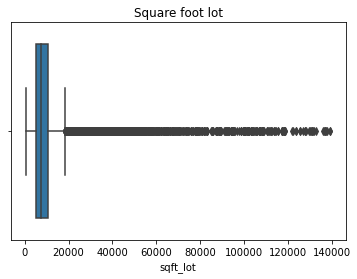

In [40]:
#review Square foot lot

sns.boxplot(x = sqft_lot)
plt.title('Square foot lot')
plt.show()

### Cleaning Bedrooms Column

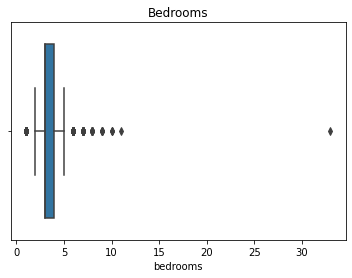

In [41]:
#visualizing bedrooms column
sns.boxplot(x = df.bedrooms)
plt.title('Bedrooms')
plt.show()

In [42]:
#remove bedrooms outliers
bedrooms = remove_outliers(df.bedrooms,3)



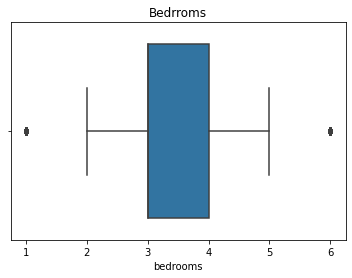

In [43]:
#review Bedrooms

sns.boxplot(x = bedrooms)
plt.title('Bedrroms')
plt.show()

### Cleaning Bathrooms Columns
    

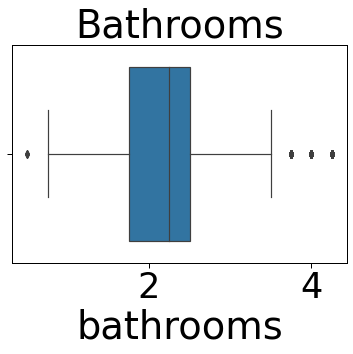

In [95]:
#visualizing bedrooms column
sns.boxplot(x = bathrooms, data = df)
plt.title('Bathrooms')
plt.show()

In [96]:
#remove outliers in bathrooms column
bathrooms = remove_outliers(df.bathrooms,3)
bathrooms

1        2.25
3        3.00
4        2.00
6        2.25
8        1.00
         ... 
21591    2.50
21592    2.50
21593    2.50
21594    0.75
21596    0.75
Name: bathrooms, Length: 15625, dtype: float64

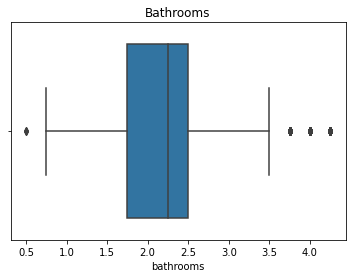

In [46]:
#reviewing bathrooms
sns.boxplot(x = bathrooms)
plt.title('Bathrooms')
plt.show()

In [112]:
#round off bathroom values to whole numbers
# Rounding off the bathroom values to whole numbers

bathrooms = bathrooms.round()
bathrooms


1        2.0
3        3.0
4        2.0
6        2.0
8        1.0
        ... 
21591    2.0
21592    2.0
21593    2.0
21594    1.0
21596    1.0
Name: bathrooms, Length: 15625, dtype: float64

### Cleaning Square Feet Above Column

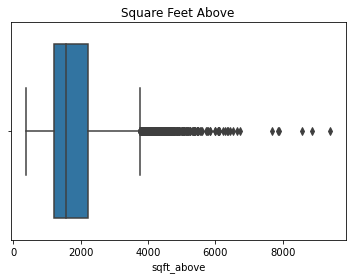

In [47]:
#visualizing Square Feet Above column
sns.boxplot(x = df.sqft_above)
plt.title('Square Feet Above')
plt.show()

In [48]:
#remove outliers
sqft_above_ground = remove_outliers(df.sqft_above,5)

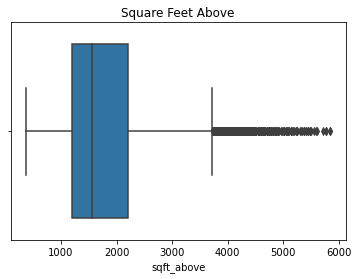

In [49]:
#review Square Feet Above
sns.boxplot(x = sqft_above_ground)
plt.title('Square Feet Above')
plt.show()


### Cleaning grade column 

In [50]:
#strip grade column and remain with grade as a number
df2 = df
df2.new_grade = df2.grade.str[:1]
df2.new_grade
df2.grade = df2.new_grade

<ipython-input-50-f209bbb5002d>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df2.new_grade = df2.grade.str[:1]


In [51]:
df = df2

In [52]:
#change grade from str to int
df.grade = df.grade.astype('int')

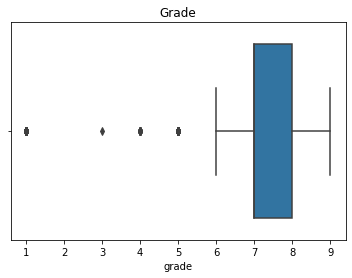

In [53]:
#visualizing grades column
sns.boxplot(x = df.grade)
plt.title('Grade')
plt.show()

In [54]:
#remove outliers
grade = remove_outliers(df.grade,1.5)

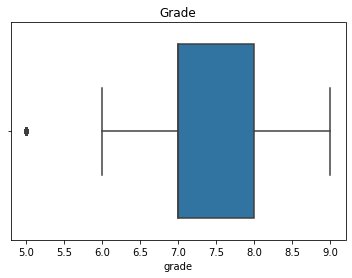

In [55]:
#review Grade Above
sns.boxplot(x = grade)
plt.title('Grade')
plt.show()

In [113]:
#data integration
processed_df = pd.concat([price, sqft_lot, sqft_living, sqft_above_ground, bathrooms, bedrooms,grade,(df.loc[:, ["condition"]])], axis=1, join='inner')
processed_df

,price,sqft_lot,sqft_living,sqft_above,bathrooms,bedrooms,grade,condition
1,538000.0,7242,2570,2170,2.0,3,7,Average
3,604000.0,5000,1960,1050,3.0,4,7,Very Good
4,510000.0,8080,1680,1680,2.0,3,8,Average
6,257500.0,6819,1715,1715,2.0,3,7,Average
8,229500.0,7470,1780,1050,1.0,3,7,Average
...,...,...,...,...,...,...,...,...
21591,475000.0,1294,1310,1180,2.0,3,8,Average
21592,360000.0,1131,1530,1530,2.0,3,8,Average
21593,400000.0,5813,2310,2310,2.0,4,8,Average
21594,402101.0,1350,1020,1020,1.0,2,7,Average


## EDA

### Univariate analysis

In [100]:
#statistical data of our data
processed_df.describe()

,price,sqft_lot,sqft_living,sqft_above,bathrooms,bedrooms,grade
count,1.426500e+04,14265.000000,14265.000000,14265.000000,14265.000000,14265.000000,14265.000000
mean,4.791293e+05,10278.500456,1923.528146,1647.178970,2.021311,3.313845,7.438346
std,2.390945e+05,13061.479881,712.118154,647.898905,0.676445,0.858705,0.882068
min,8.200000e+04,520.000000,370.000000,370.000000,0.500000,1.000000,5.000000
25%,3.100000e+05,5000.000000,1390.000000,1160.000000,1.500000,3.000000,7.000000
50%,4.300000e+05,7350.000000,1830.000000,1490.000000,2.000000,3.000000,7.000000
75%,5.872060e+05,9889.000000,2370.000000,2010.000000,2.500000,4.000000,8.000000
max,2.400000e+06,139392.000000,6050.000000,5450.000000,4.250000,6.000000,9.000000


#### Continous Data

The continous data in our analysis is made up of:
1. Price
2. sqft_lot
3. sqft_living
4. sqft_above

1. Price

Text(0.5, 0.98, 'Price Distribution')

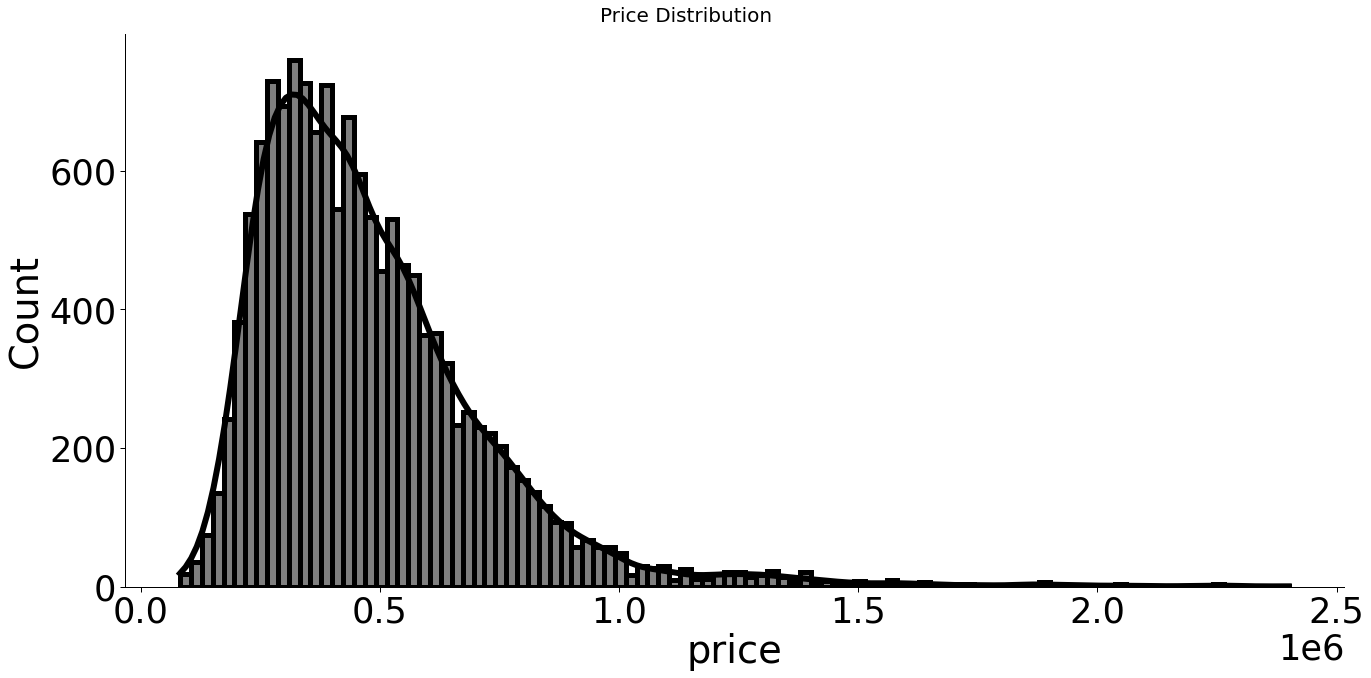

In [101]:
#plotting a histogram showing the continous distibution of the price data.
ax = sns.displot(processed_df['price'], kde = True, line_kws={'color': '0.75', 'lw': 6} , color = "black", height=10, aspect=2, 
            linewidth = 5 )

ax.fig.suptitle('Price Distribution', size = 20)

2. sqft_lot

Text(0.5, 0.98, 'sqft_lot Distribution')

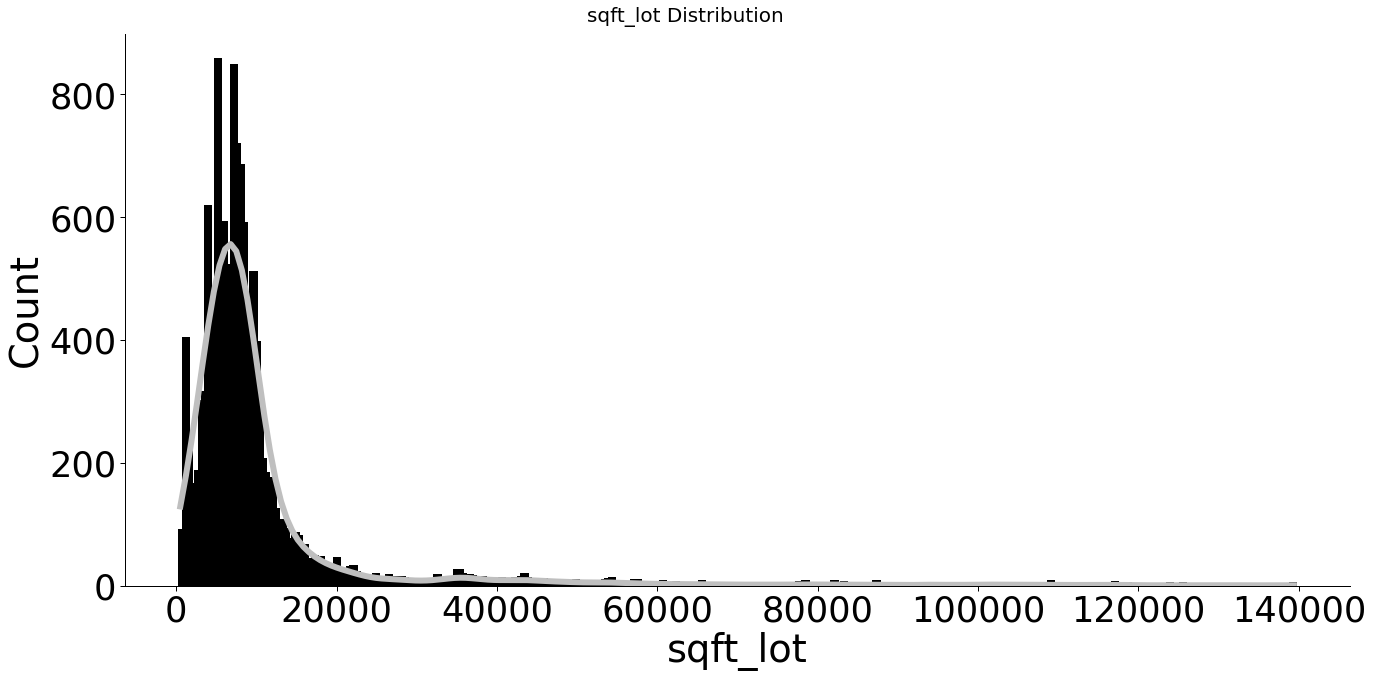

In [102]:
#plotting a histogram showing the continous distibution of the sqft_lot data.
ax = sns.displot(processed_df['sqft_lot'], kde = True, line_kws={'color': 'black', 'lw': 6} , color = "0.75", height=10, aspect=2, 
            linewidth = 5 )

ax.fig.suptitle('sqft_lot Distribution', size = 20)

3. sqft_living

Text(0.5, 0.98, 'sqft_living Distribution')

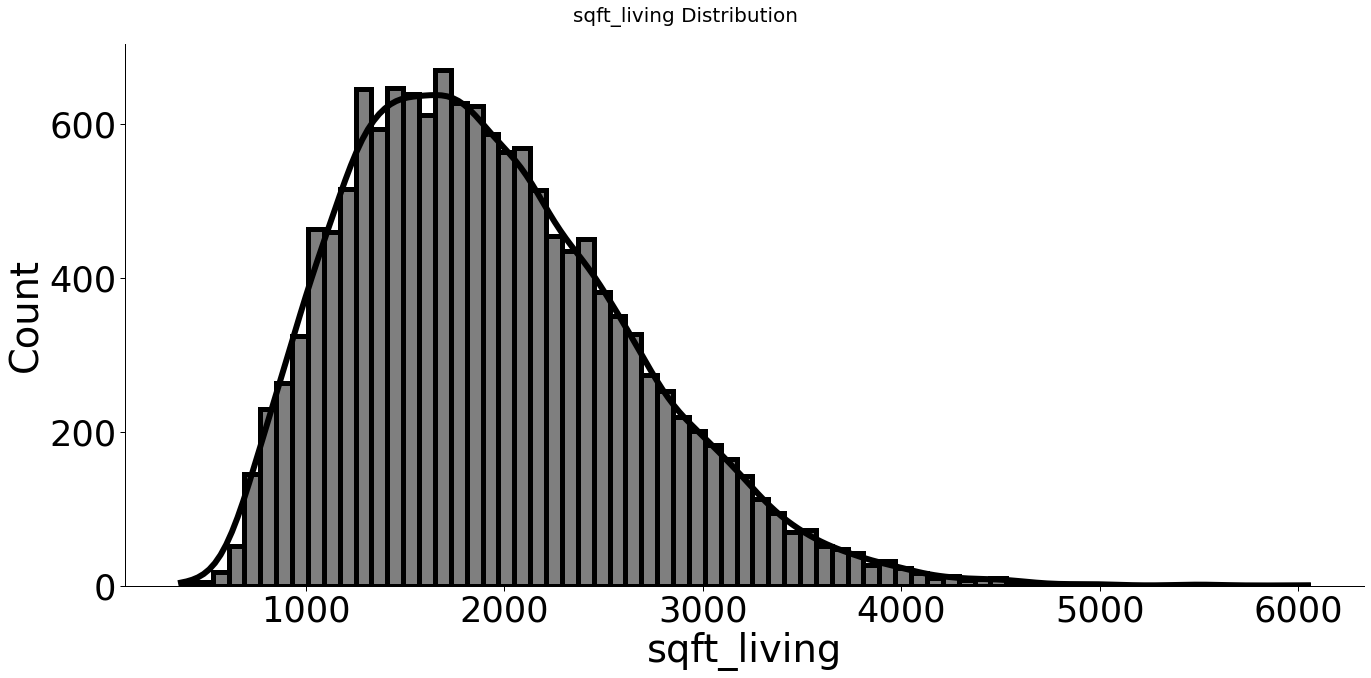

In [103]:
#plotting a histogram showing the continous distibution of the sqft_living data.
ax = sns.displot(processed_df['sqft_living'], kde = True, line_kws={'color': '0.75', 'lw': 6} , color = "black", height=10, aspect=2, 
            linewidth = 5 )

ax.fig.suptitle('sqft_living Distribution', size = 20)

4. sqft_above

Text(0.5, 0.98, 'sqft_above Distribution')

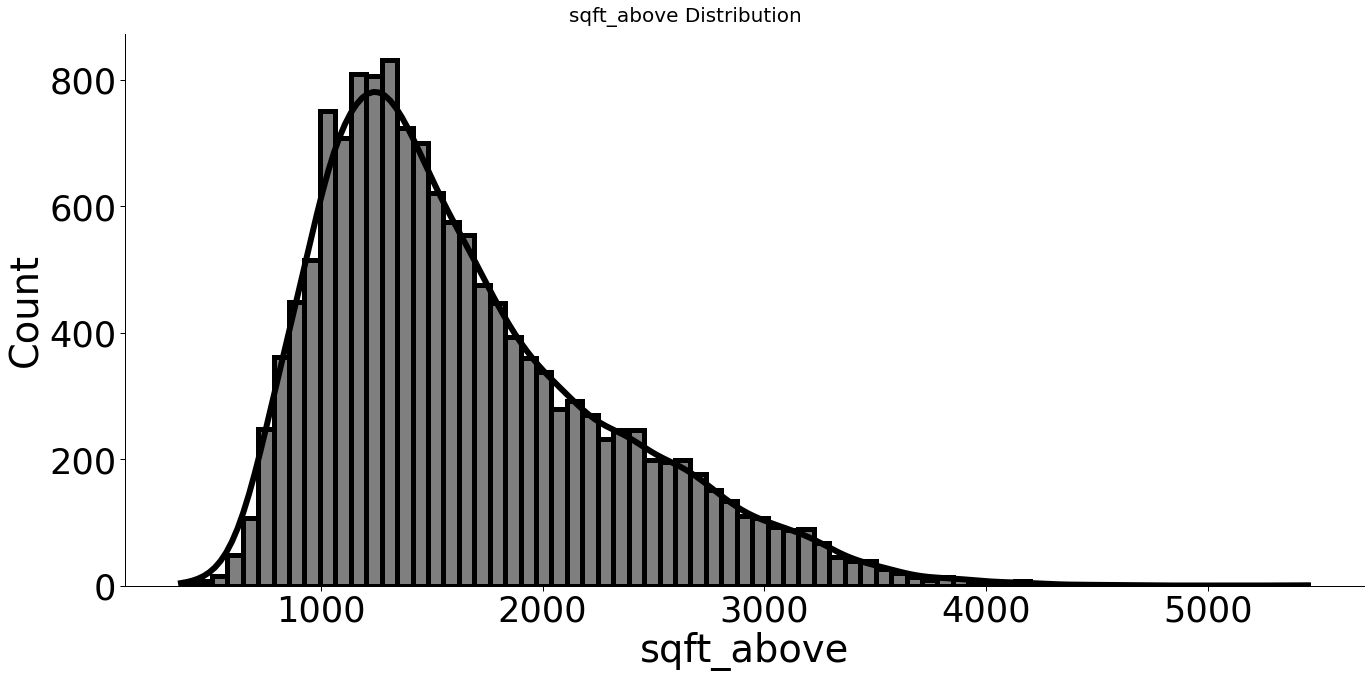

In [104]:
#plotting a histogram showing the continous distibution of the sqft_above data.
ax = sns.displot(processed_df['sqft_above'], kde = True, line_kws={'color': '0.75', 'lw': 6} , color = "black", height=10, aspect=2, 
            linewidth = 5 )

ax.fig.suptitle('sqft_above Distribution', size = 20)

Relationship  between price and each continous data variable

Price vs Sqft_lot

In [105]:
#calculate the average price per sqft_lot
#define function
def price_per_variable(price_mean,x_mean):
    price_per_variable = price_mean.mean()/x_mean.mean()
    return price_per_variable

print('For each sqft_lot the price is', price_per_variable(processed_df.price,processed_df.sqft_lot))



For each sqft_lot the price is 46.61470452390529


Price vs Sqft_living

In [106]:
#calculate the price per sqft_living
print('For each sqft_living the price is', price_per_variable(processed_df.price,processed_df.sqft_living))

For each sqft_living the price is 249.0887709300102


Price vs Sqft_above

In [107]:
#calculate the price per sqft_above
print('For each sqft_above the price is', price_per_variable(processed_df.price,processed_df.sqft_above))

For each sqft_above the price is 290.8786905124261


#### Categorical Data

The categorical data in our analysis is made up of:
1. Bathrooms
2. Bedrooms
3. Grade
4. Condition

1. Bathrooms

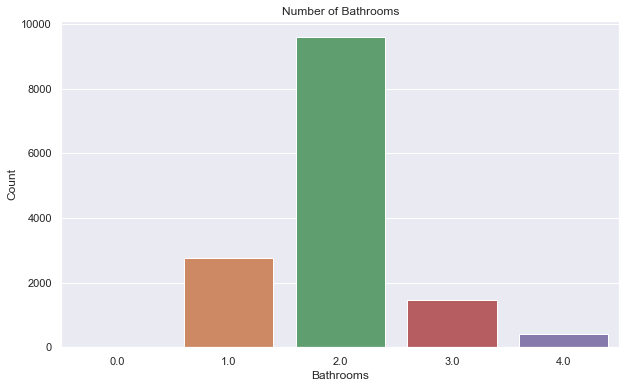

In [114]:
plt.figure(figsize=(10,6))

sns.countplot(x='bathrooms', data= processed_df)
plt.title('Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
sns.set(font_scale=1.0)
plt.show()


From the above analysis most houses had 2 bathrooms.

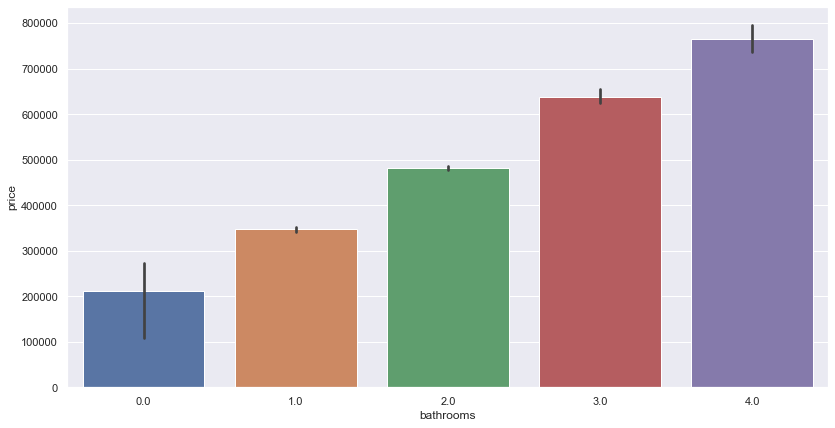

In [116]:
#bathroom vs price
plt.figure(figsize=(30,7))
plt.subplot(1,2,1)
sns.barplot(x='bathrooms', y='price', data=processed_df)
sns.set(font_scale=1.0)


From this analysis we can see that the houses with more bathrooms had the highest prices

2. Bedrooms

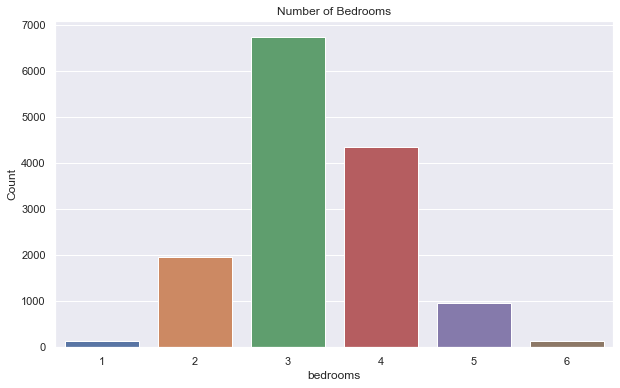

In [117]:
plt.figure(figsize=(10,6))

sns.countplot(x='bedrooms', data= processed_df)
plt.title('Number of Bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('Count')
sns.set(font_scale=1.0)
plt.show()

From this analysis, most houses had 3 bedrooms

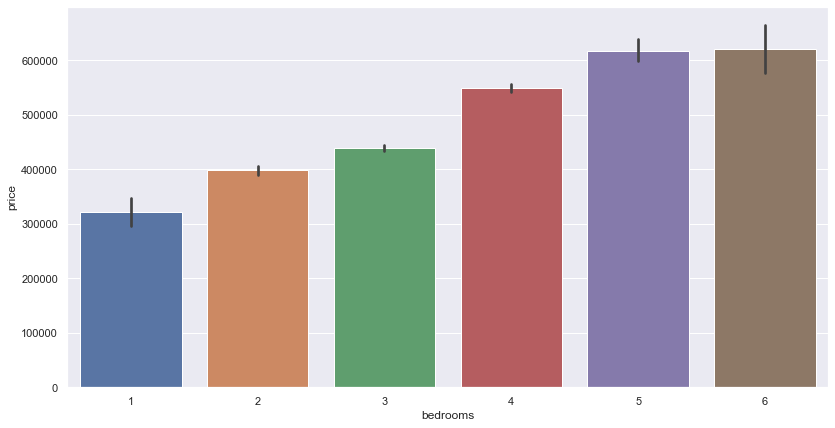

In [122]:
#bedrooms vs price
plt.figure(figsize=(30,7))
plt.subplot(1,2,1)
sns.barplot(x='bedrooms', y='price', data=processed_df)
sns.set(font_scale=1.0)

From the above analysis the more bedrooms a house has the more expensive it was.

3. Grade

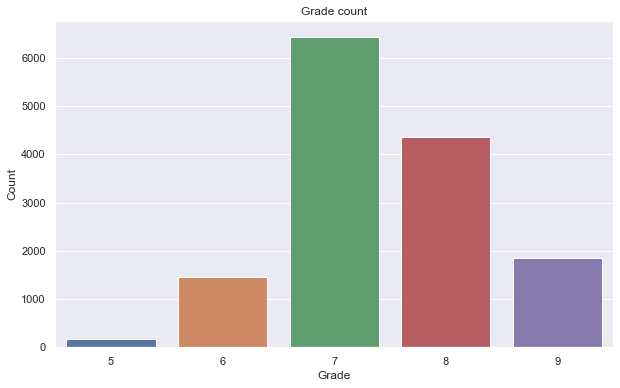

In [123]:
plt.figure(figsize=(10,6))

sns.countplot(x='grade', data= processed_df)
plt.title('Grade count')
plt.xlabel('Grade')
plt.ylabel('Count')
sns.set(font_scale=1.0)
plt.show()

Most houses had a grade of 7

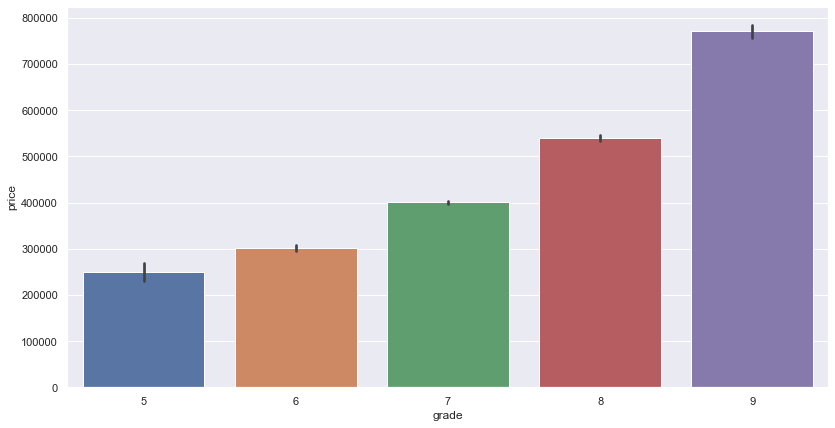

In [124]:
plt.figure(figsize=(30,7))
plt.subplot(1,2,1)
sns.barplot(x='grade', y='price', data=processed_df)
sns.set(font_scale=1.0)

The above analysis concludes that the higher a house grade the higher the price

4. Condition

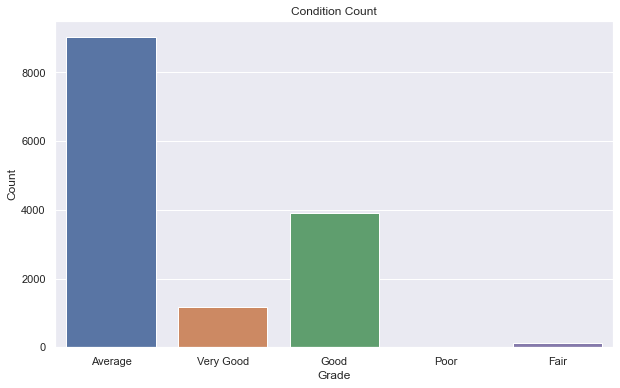

In [125]:
plt.figure(figsize=(10,6))

sns.countplot(x='condition', data= processed_df)
plt.title('Condition Count')
plt.xlabel('Grade')
plt.ylabel('Count')
sns.set(font_scale=1.0)
plt.show()

From the analysis above most houses were of average condition.

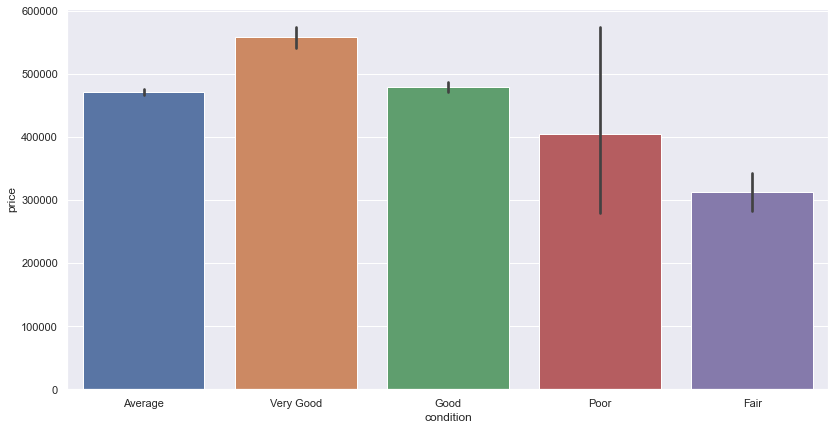

In [126]:
plt.figure(figsize=(30,7))
plt.subplot(1,2,1)
sns.barplot(x='condition', y='price', data=processed_df)
sns.set(font_scale=1.0)

Houses in a very good condition had the highest price according the above analysis.

## Visualization

### Linearity of the variables

In [ ]:
#scatter plots to show linearity
#sns.pairplot(processed_df)
#plt.show();

### Correlation between Variables

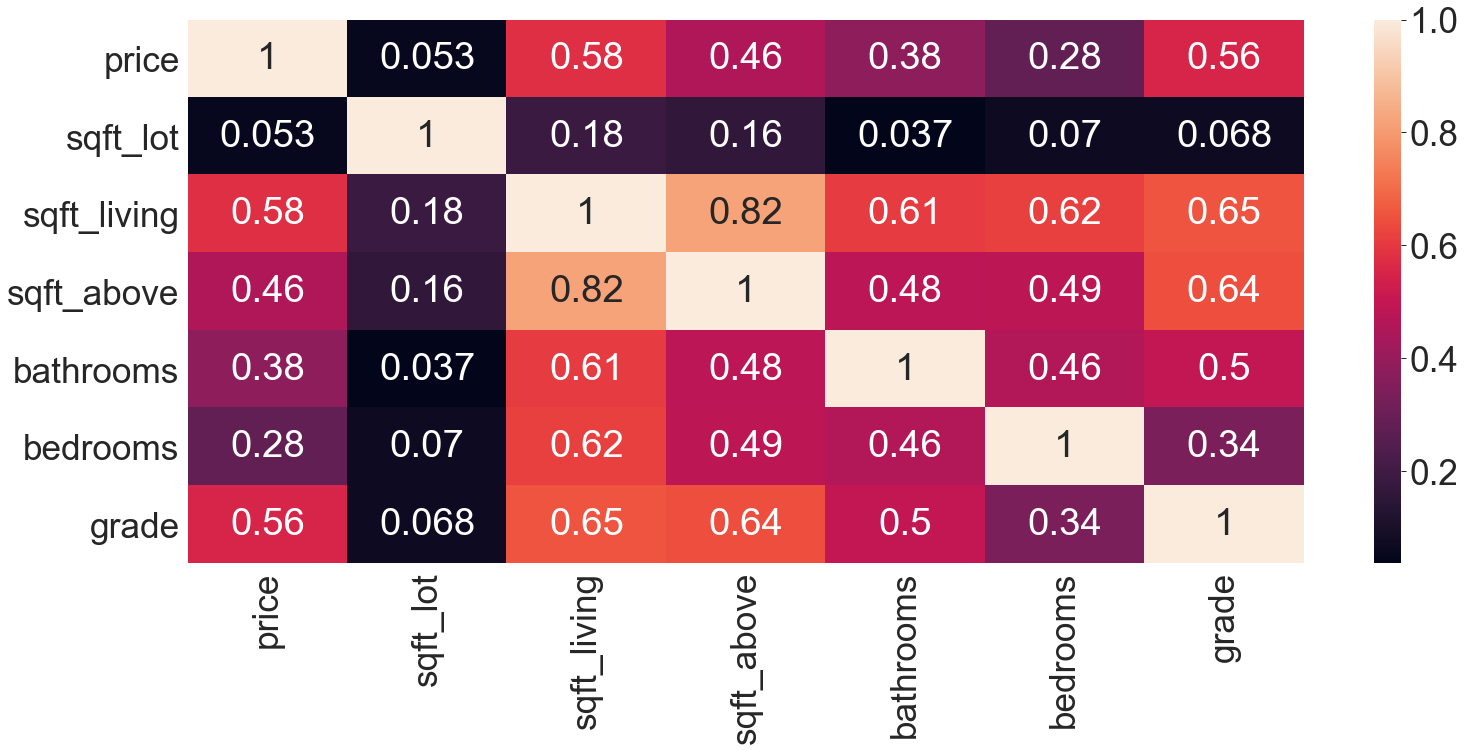

In [128]:
#heatmap to show correlation
plt.figure(figsize=(25,10))
sns.set_context("paper",font_scale=4)
sns.heatmap(processed_df.corr(),annot=True)
plt.show()

## Regression models

### Simple Linear Regression Model - Price vs Sqft_living

In [60]:
regression_1 = smf.ols('price ~ sqft_living',data = processed_df).fit()
regression_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     7310.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:39:38   Log-Likelihood:            -1.9396e+05
No. Observations:               14265   AIC:                         3.879e+05
Df Residuals:                   14263   BIC:                         3.879e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.032e+05   4688.633     22.007      0.000     9.4e+04    1.12e+05
sqft_living   195.4471      2.286     85.501      0.000     190.966     199.928
==============================================================================
Omnibus:                     4639.506   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23008.677
Skew:                           1.497   Prob(JB):                         0.00
Kurtosis:                       8.455   Cond. No.                     5.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

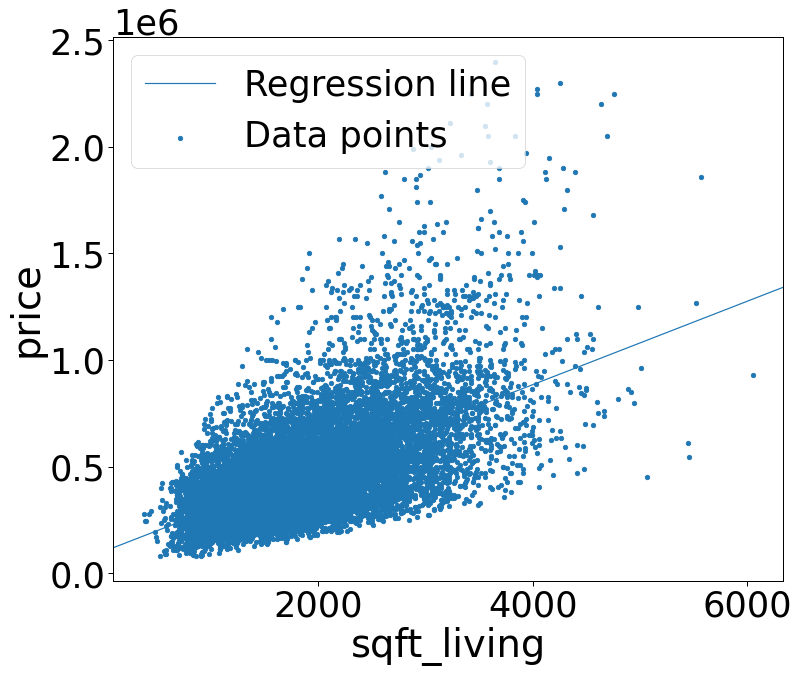

In [61]:
fig, ax = plt.subplots(figsize = (12,10))
processed_df.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=regression_1, label="Regression line", ax=ax)
ax.legend();

### Simple Linear Regression Model - Price vs Sqft_above

In [62]:
regression_2 = smf.ols('price ~ sqft_above',data = processed_df).fit()
regression_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     3745.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:39:41   Log-Likelihood:            -1.9524e+05
No. Observations:               14265   AIC:                         3.905e+05
Df Residuals:                   14263   BIC:                         3.905e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.019e+05   4867.449     41.483      0.000    1.92e+05    2.11e+05
sqft_above   168.2954      2.750     61.199      0.000     162.905     173.686
==============================================================================
Omnibus:                     5257.928   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27720.229
Skew:                           1.701   Prob(JB):                         0.00
Kurtosis:                       8.922   Cond. No.                     4.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

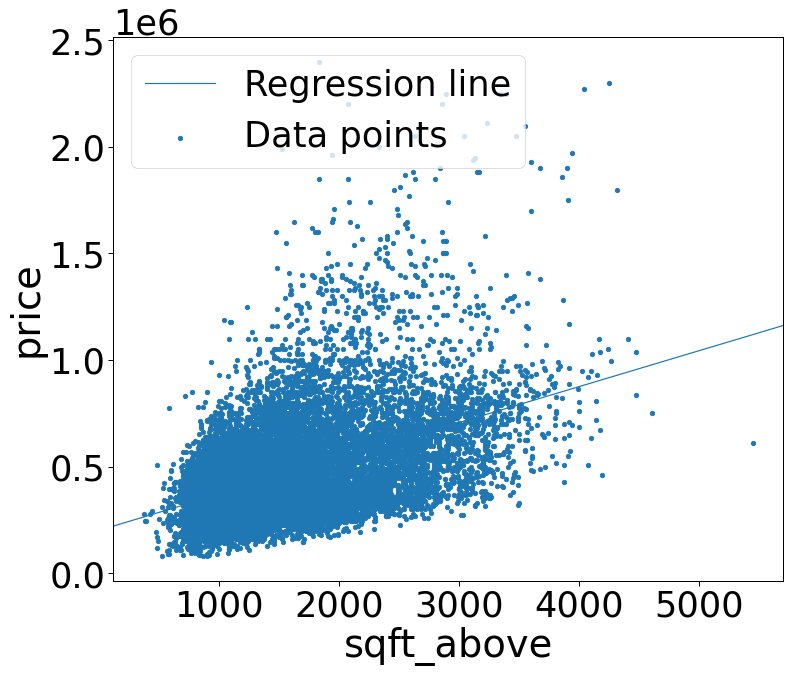

In [63]:
fig, ax = plt.subplots(figsize = (12,10))
processed_df.plot.scatter(x="sqft_above", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=regression_2, label="Regression line", ax=ax)
ax.legend();

### Multiple Linear Regression

sqft_lot	sqft_living	sqft_above	bathrooms	bedrooms	grade

In [114]:
m_regression = smf.ols('price ~ sqft_living + bathrooms + sqft_above + sqft_lot +grade',data= processed_df).fit()

regression_summary = m_regression.summary()

regression_summary



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     1966.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        00:06:25   Log-Likelihood:            -1.9317e+05
No. Observations:               14265   AIC:                         3.863e+05
Df Residuals:                   14259   BIC:                         3.864e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.279e+05   1.46e+04    -29.237      0.000   -4.57e+05   -3.99e+05
sqft_living   189.3183      4.284     44.194      0.000     180.922     197.715
bathrooms   -3.543e+04   3307.656    -10.712      0.000   -4.19e+04   -2.89e+04
sqft_above    -62.9554      4.303    -14.630      0.000     -71.390     -54.521
sqft_lot       -0.8081      0.121     -6.662      0.000      -1.046      -0.570
grade        9.767e+04   2470.635     39.532      0.000    9.28e+04    1.03e+05
==============================================================================
Omnibus:                     5018.103   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30748.971
Skew:                           1.559   Prob(JB):                         0.00
Kurtosis:                       9.482   Cond. No.                     1.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
X = pd.get_dummies(processed_df,columns = ['grade'],drop_first = True)

In [116]:
type(processed_df['grade'])

pandas.core.series.Series

In [117]:
dummies

,price,sqft_lot,sqft_living,sqft_above,bathrooms,bedrooms,condition,waterfront,yr_built,view,grade_6,grade_7,grade_8,grade_9
1,538000.0,7242,2570,2170,2.25,3,Average,NO,1951,NONE,0,1,0,0
3,604000.0,5000,1960,1050,3.00,4,Very Good,NO,1965,NONE,0,1,0,0
4,510000.0,8080,1680,1680,2.00,3,Average,NO,1987,NONE,0,0,1,0
6,257500.0,6819,1715,1715,2.25,3,Average,NO,1995,NONE,0,1,0,0
8,229500.0,7470,1780,1050,1.00,3,Average,NO,1960,NONE,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,1294,1310,1180,2.50,3,Average,NO,2008,NONE,0,0,1,0
21592,360000.0,1131,1530,1530,2.50,3,Average,NO,2009,NONE,0,0,1,0
21593,400000.0,5813,2310,2310,2.50,4,Average,NO,2014,NONE,0,0,1,0
21594,402101.0,1350,1020,1020,0.75,2,Average,NO,2009,NONE,0,1,0,0


In [120]:
y = processed_df["price"]
X = processed_df[["sqft_lot", "sqft_living","sqft_above","bathrooms","bedrooms", "grade"]]
X = pd.get_dummies(X, columns=["grade"], drop_first=True)
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     1169.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        00:09:49   Log-Likelihood:            -1.9296e+05
No. Observations:               14265   AIC:                         3.859e+05
Df Residuals:                   14255   BIC:                         3.860e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.055e+05   1.52e+04     13.539      

In [121]:
# Create a list of predictor variables
X = df[['sqft_living', 'bedrooms', 'bathrooms']]

# Add a constant column to X
X = sm.add_constant(X)

# Create the response variable
y = df['price']

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     5545.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        00:11:22   Log-Likelihood:            -2.1887e+05
No. Observations:               15762   AIC:                         4.377e+05
Df Residuals:                   15758   BIC:                         4.378e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         6.86e+04   8155.577      8.411      